<a href="https://colab.research.google.com/github/Somasri/SKMLI-143_Tasks/blob/main/phase5(major).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import keras
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [11]:
# Load the dataset
ipl = pd.read_csv('/content/ipl_data.csv')
ipl.head()


,mid,date,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [12]:
# Dropping unnecessary features
df = ipl.drop(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'mid', 'striker', 'non-striker'], axis=1)


In [13]:
# Separating features and target variable
X = df.drop(['total'], axis=1)
y = df['total']


In [14]:
# Label Encoding for categorical features
batting_team_encoder = LabelEncoder()
bowling_team_encoder = LabelEncoder()
striker_encoder = LabelEncoder()
bowler_encoder = LabelEncoder()

X['bat_team'] = batting_team_encoder.fit_transform(X['bat_team'])
X['bowl_team'] = bowling_team_encoder.fit_transform(X['bowl_team'])
X['batsman'] = striker_encoder.fit_transform(X['batsman'])
X['bowler'] = bowler_encoder.fit_transform(X['bowler'])


Epoch 1/25
832/832 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 56.2190 - val_loss: 22.1550
Epoch 2/25
832/832 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 22.5941 - val_loss: 22.2606
Epoch 3/25
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 22.4755 - val_loss: 22.8084
Epoch 4/25
832/832 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 22.5788 - val_loss: 22.6144
Epoch 5/25
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 22.4178 - val_loss: 22.1352
Epoch 6/25
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 22.4695 - val_loss: 22.4172
Epoch 7/25
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 22.4153 - val_loss: 22.1342
Epoch 8/25
832/832 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 22.5749 - val_loss: 22.1145
Epoch 9/25
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 22.5230 - val_loss: 22.1145
Epoch 10/25
832/832 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 22.3365 - val_loss: 22.0970
Epoch 11/25
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 22.4052 - val_loss: 22.4014
Epoch 12/25
832/832 ━━━━━━━━━━

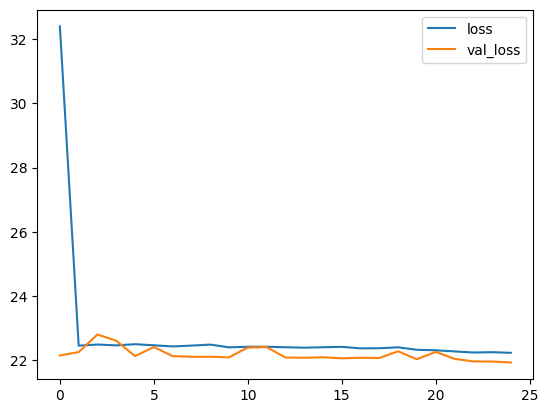

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [18]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the neural network model
model = keras.Sequential([
    keras.layers.Input(shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(216, activation='relu'),
    keras.layers.Dense(1, activation='linear')
])

# Compile the model with Huber loss
huber_loss = tf.keras.losses.Huber(delta=1.0)
model.compile(optimizer='adam', loss=huber_loss)

# Train the model
model.fit(X_train_scaled, y_train, epochs=25, batch_size=64, validation_data=(X_test_scaled, y_test))
# Plot model losses
model_losses = pd.DataFrame(model.history.history)
model_losses.plot()
plt.show()

# Make predictions
predictions = model.predict(X_test_scaled)


In [19]:
# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")


Mean Absolute Error: 22.43103999744458
Mean Squared Error: 829.6898984708357


In [22]:
# Function to predict the score
def predict_score():
    # User inputs
    batting_team = input("Enter Batting Team: ")
    bowling_team = input("Enter Bowling Team: ")
    striker = input("Enter Striker: ")
    bowler = input("Enter Bowler: ")

    # Encode the inputs
    encoded_batting_team = batting_team_encoder.transform([batting_team])
    encoded_bowling_team = bowling_team_encoder.transform([bowling_team])
    encoded_striker = striker_encoder.transform([striker])
    encoded_bowler = bowler_encoder.transform([bowler])

    # Prepare the input array
    input_data = np.array([encoded_batting_team[0], encoded_bowling_team[0], encoded_striker[0], encoded_bowler[0]])
    input_data = input_data.reshape(1, -1)

    # Scale the input data
    input_data_scaled = scaler.transform(input_data)

    # Predict the score
    predicted_score = model.predict(input_data_scaled)

    print(f"Predicted Score: {predicted_score[0][0]}")

# Predict a score based on user input
predict_score()


Enter Batting Team: Sunrisers Hyderabad
Enter Bowling Team: Mumbai Indians
Enter Striker: DA Warner
Enter Bowler: JJ Bumrah
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted Score: 162.31448364257812


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
